In [1]:
import pandas as pd
import numpy as np
from sympy.logic.algorithms.lra_theory import UnhandledInput

In [2]:
from common.libs.data_analysis.SeriesDescriber import *
from common.libs.data_analysis.SeriesDescriberWRTTarget import *
from common.libs.DataDisplayer import *

In [14]:
oil_df = pd.read_csv("inputs/transformed/oil.csv", delimiter=",")
holiday_events_df = pd.read_csv("inputs/transformed/holidays_events.csv", delimiter=",")
stores_df = pd.read_csv("inputs/raw/stores.csv", delimiter=",").set_index("store_nbr")
transactions_df = pd.read_csv("inputs/transformed/transactions.csv", delimiter=",")
train_df = pd.read_csv("inputs/transformed/train.csv", delimiter=",")

### Data Analysis

In [15]:
def df_info(df):
    display_side_by_side(df.describe(), df.head())
    df.info(verbose=1, show_counts=True)

In [16]:
df_info(oil_df)

dcoilwtico 
 
 
 
 
 count 
 1704.000000 
 
 
 mean 
 67.683894 
 
 
 std 
 25.619978 
 
 
 min 
 26.190000 
 
 
 25% 
 46.414687 
 
 
 50% 
 53.088125 
 
 
 75% 
 95.553214 
 
 
 max 
 110.620000 
 
 
 
 
 
 
 date 
 dcoilwtico 
 
 
 
 
 0 
 2013-01-01 
 93.076667 
 
 
 1 
 2013-01-02 
 93.140000 
 
 
 2 
 2013-01-03 
 92.970000 
 
 
 3 
 2013-01-04 
 93.120000 
 
 
 4 
 2013-01-05 
 93.113810

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1704 non-null   object 
 1   dcoilwtico  1704 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [17]:
df_info(holiday_events_df)

Unnamed: 0 
 
 
 
 
 count 
 338.000000 
 
 
 mean 
 172.026627 
 
 
 std 
 100.231494 
 
 
 min 
 0.000000 
 
 
 25% 
 86.250000 
 
 
 50% 
 171.500000 
 
 
 75% 
 256.500000 
 
 
 max 
 349.000000 
 
 
 
 
 
 
 Unnamed: 0 
 date 
 type 
 locale 
 locale_name 
 
 
 
 
 0 
 0 
 2012-03-02 
 Holiday 
 Local 
 Manta 
 
 
 1 
 1 
 2012-04-01 
 Holiday 
 Regional 
 Cotopaxi 
 
 
 2 
 2 
 2012-04-12 
 Holiday 
 Local 
 Cuenca 
 
 
 3 
 3 
 2012-04-14 
 Holiday 
 Local 
 Libertad 
 
 
 4 
 4 
 2012-04-21 
 Holiday 
 Local 
 Riobamba

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   338 non-null    int64 
 1   date         338 non-null    object
 2   type         338 non-null    object
 3   locale       338 non-null    object
 4   locale_name  338 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.3+ KB


In [18]:
describe_categorical_series(holiday_events_df["type"])

,type
count,338
unique,5
top,Holiday
freq,221
,count
type,
Holiday,221
Event,56
Additional,51
Bridge,5


In [19]:
locale_name = "Ecuador"
display_side_by_side(
        stores_df[stores_df["city"] == locale_name].head(),
        stores_df[stores_df["state"] == locale_name].head(),
)

# Regional : state

,city,state,type,cluster
store_nbr,,,,
,city,state,type,cluster
store_nbr,,,,


In [20]:
holiday_events_df[holiday_events_df["locale"] == "National"].head()

,Unnamed: 0,date,type,locale,locale_name
14,14,2012-08-10,Holiday,National,Ecuador
19,19,2012-10-09,Holiday,National,Ecuador
20,21,2012-11-02,Holiday,National,Ecuador
21,22,2012-11-03,Holiday,National,Ecuador
30,31,2012-12-21,Additional,National,Ecuador


In [21]:
df_info(holiday_events_df)

Unnamed: 0 
 
 
 
 
 count 
 338.000000 
 
 
 mean 
 172.026627 
 
 
 std 
 100.231494 
 
 
 min 
 0.000000 
 
 
 25% 
 86.250000 
 
 
 50% 
 171.500000 
 
 
 75% 
 256.500000 
 
 
 max 
 349.000000 
 
 
 
 
 
 
 Unnamed: 0 
 date 
 type 
 locale 
 locale_name 
 
 
 
 
 0 
 0 
 2012-03-02 
 Holiday 
 Local 
 Manta 
 
 
 1 
 1 
 2012-04-01 
 Holiday 
 Regional 
 Cotopaxi 
 
 
 2 
 2 
 2012-04-12 
 Holiday 
 Local 
 Cuenca 
 
 
 3 
 3 
 2012-04-14 
 Holiday 
 Local 
 Libertad 
 
 
 4 
 4 
 2012-04-21 
 Holiday 
 Local 
 Riobamba

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   338 non-null    int64 
 1   date         338 non-null    object
 2   type         338 non-null    object
 3   locale       338 non-null    object
 4   locale_name  338 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.3+ KB


In [22]:
df_info(stores_df)

cluster 
 
 
 
 
 count 
 54.000000 
 
 
 mean 
 8.481481 
 
 
 std 
 4.693395 
 
 
 min 
 1.000000 
 
 
 25% 
 4.000000 
 
 
 50% 
 8.500000 
 
 
 75% 
 13.000000 
 
 
 max 
 17.000000 
 
 
 
 
 
 
 city 
 state 
 type 
 cluster 
 
 
 store_nbr 
 
 
 
 
 
 
 
 
 1 
 Quito 
 Pichincha 
 D 
 13 
 
 
 2 
 Quito 
 Pichincha 
 D 
 13 
 
 
 3 
 Quito 
 Pichincha 
 D 
 8 
 
 
 4 
 Quito 
 Pichincha 
 D 
 9 
 
 
 5 
 Santo Domingo 
 Santo Domingo de los Tsachilas 
 D 
 4

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1 to 54
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     54 non-null     object
 1   state    54 non-null     object
 2   type     54 non-null     object
 3   cluster  54 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.1+ KB


In [23]:
describe_categorical_series(stores_df["type"])

,type
count,54
unique,5
top,D
freq,18
,count
type,
D,18
C,15
A,9
B,8


In [24]:
df_info(transactions_df)

store_nbr 
 transactions 
 
 
 
 
 count 
 83488.000000 
 83488.000000 
 
 
 mean 
 26.939237 
 1694.602158 
 
 
 std 
 15.608204 
 963.286644 
 
 
 min 
 1.000000 
 5.000000 
 
 
 25% 
 13.000000 
 1046.000000 
 
 
 50% 
 27.000000 
 1393.000000 
 
 
 75% 
 40.000000 
 2079.000000 
 
 
 max 
 54.000000 
 8359.000000 
 
 
 
 
 
 
 date 
 store_nbr 
 transactions 
 
 
 
 
 0 
 2013-01-01 
 25 
 770 
 
 
 1 
 2013-01-02 
 1 
 2111 
 
 
 2 
 2013-01-02 
 2 
 2358 
 
 
 3 
 2013-01-02 
 3 
 3487 
 
 
 4 
 2013-01-02 
 4 
 1922

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [25]:
df_info(train_df)

store_nbr 
 AUTOMOTIVE 
 BABY CARE 
 BEAUTY 
 BEVERAGES 
 BOOKS 
 BREAD/BAKERY 
 CELEBRATION 
 CLEANING 
 DAIRY 
 DELI 
 EGGS 
 FROZEN FOODS 
 GROCERY I 
 GROCERY II 
 HARDWARE 
 HOME AND KITCHEN I 
 HOME AND KITCHEN II 
 HOME APPLIANCES 
 HOME CARE 
 LADIESWEAR 
 LAWN AND GARDEN 
 LINGERIE 
 LIQUOR,WINE,BEER 
 MAGAZINES 
 MEATS 
 PERSONAL CARE 
 PET SUPPLIES 
 PLAYERS AND ELECTRONICS 
 POULTRY 
 PREPARED FOODS 
 PRODUCE 
 SCHOOL AND OFFICE SUPPLIES 
 SEAFOOD 
 
 
 
 
 count 
 90936.00000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 90936.000000 
 
 
 mean 
 27.50000 
 6.101236 
 0.110528 
 3.715723 
 2385.793151 
 0.070797 
 463.336254 
 8.370469 
 1072.416744 
 709.154889 
 265.135067 
 171.420516 
 154.766954 
 3776.972100 
 21.584048 
 1.137833 
 20.470342 
 16.722420 
 0.457476 
 176.198029 
 7.160629 
 6.035475 
 7.182128 
 85.187824 
 2.929082 
 341.849965 
 270.432513 
 3.921263 
 6.186857 
 350.532292 
 96.770202 
 1349.352123 
 2.961599 
 22.163190 
 
 
 std 
 15.58587 
 6.191691 
 0.681064 
 4.794668 
 2307.882305 
 0.547981 
 368.246367 
 15.927114 
 734.681493 
 671.949638 
 210.417073 
 161.826783 
 324.971305 
 2874.208845 
 31.062425 
 1.638040 
 35.967646 
 31.298823 
 0.969551 
 209.916580 
 13.946302 
 12.283458 
 9.474520 
 126.555637 
 6.008492 
 455.908498 
 226.512007 
 7.657852 
 10.544497 
 400.511631 
 104.695144 
 2186.481332 
 21.745937 
 32.627628 
 
 
 min 
 1.00000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 
 
 25% 
 14.00000 
 2.000000 
 0.000000 
 0.000000 
 897.000000 
 0.000000 
 184.000000 
 0.000000 
 630.000000 
 259.000000 
 135.574750 
 67.000000 
 35.878499 
 2117.000000 
 4.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 2.000000 
 12.000000 
 0.000000 
 120.913750 
 137.000000 
 0.000000 
 0.000000 
 103.683250 
 31.000000 
 0.000000 
 0.000000 
 1.000000 
 
 
 50% 
 27.50000 
 5.000000 
 0.000000 
 2.000000 
 1784.000000 
 0.000000 
 401.000000 
 3.000000 
 938.000000 
 520.000000 
 218.971500 
 131.000000 
 83.000000 
 3185.000000 
 12.000000 
 1.000000 
 12.000000 
 9.000000 
 0.000000 
 143.000000 
 0.000000 
 1.000000 
 5.000000 
 47.000000 
 0.000000 
 224.936500 
 222.000000 
 0.000000 
 2.000000 
 205.743000 
 63.960000 
 398.290500 
 0.000000 
 8.000000 
 
 
 75% 
 41.00000 
 8.000000 
 0.000000 
 5.000000 
 3119.000000 
 0.000000 
 645.000000 
 12.000000 
 1378.000000 
 926.000000 
 334.679000 
 227.000000 
 173.910750 
 4726.000000 
 30.000000 
 2.000000 
 28.000000 
 21.000000 
 1.000000 
 273.000000 
 9.000000 
 8.000000 
 10.000000 
 108.000000 
 3.000000 
 457.500250 
 340.000000 
 5.000000 
 8.000000 
 457.317500 
 122.059250 
 1798.894000 
 1.000000 
 28.280250 
 
 
 max 
 54.00000 
 255.000000 
 116.000000 
 136.000000 
 25413.000000 
 51.000000 
 4551.298000 
 1783.000000 
 11377.000000 
 5636.000000 
 2118.325000 
 3110.000000 
 14541.550000 
 124717.000000 
 2931.000000 
 49.000000 
 1935.000000 
 1568.000000 
 15.000000 
 2504.000000 
 147.000000 
 712.000000 
 1059.000000 
 4821.000000 
 79.000000 
 89576.360000 
 7504.000000 
 106.000000 
 269.000000 
 12143.201000 
 912.568000 
 17850.615000 
 1332.000000 
 274.440000 
 
 
 
 
 
 
 date 
 store_nbr 
 AUTOMOTIVE 
 BABY CARE 
 BEA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        90936 non-null  object 
 1   store_nbr                   90936 non-null  int64  
 2   AUTOMOTIVE                  90936 non-null  float64
 3   BABY CARE                   90936 non-null  float64
 4   BEAUTY                      90936 non-null  float64
 5   BEVERAGES                   90936 non-null  float64
 6   BOOKS                       90936 non-null  float64
 7   BREAD/BAKERY                90936 non-null  float64
 8   CELEBRATION                 90936 non-null  float64
 9   CLEANING                    90936 non-null  float64
 10  DAIRY                       90936 non-null  float64
 11  DELI                        90936 non-null  float64
 12  EGGS                        90936 non-null  float64
 13  FROZEN FOODS                909

In [26]:
describe_categorical_series(train_df["store_nbr"])

,store_nbr
count,90936
unique,54
top,1
freq,1684
,count
store_nbr,
1,1684
2,1684
3,1684
4,1684


### More Data Analysis


#### Trying to make transactions useful (unsuccessfully)


KeyError: 'sales'

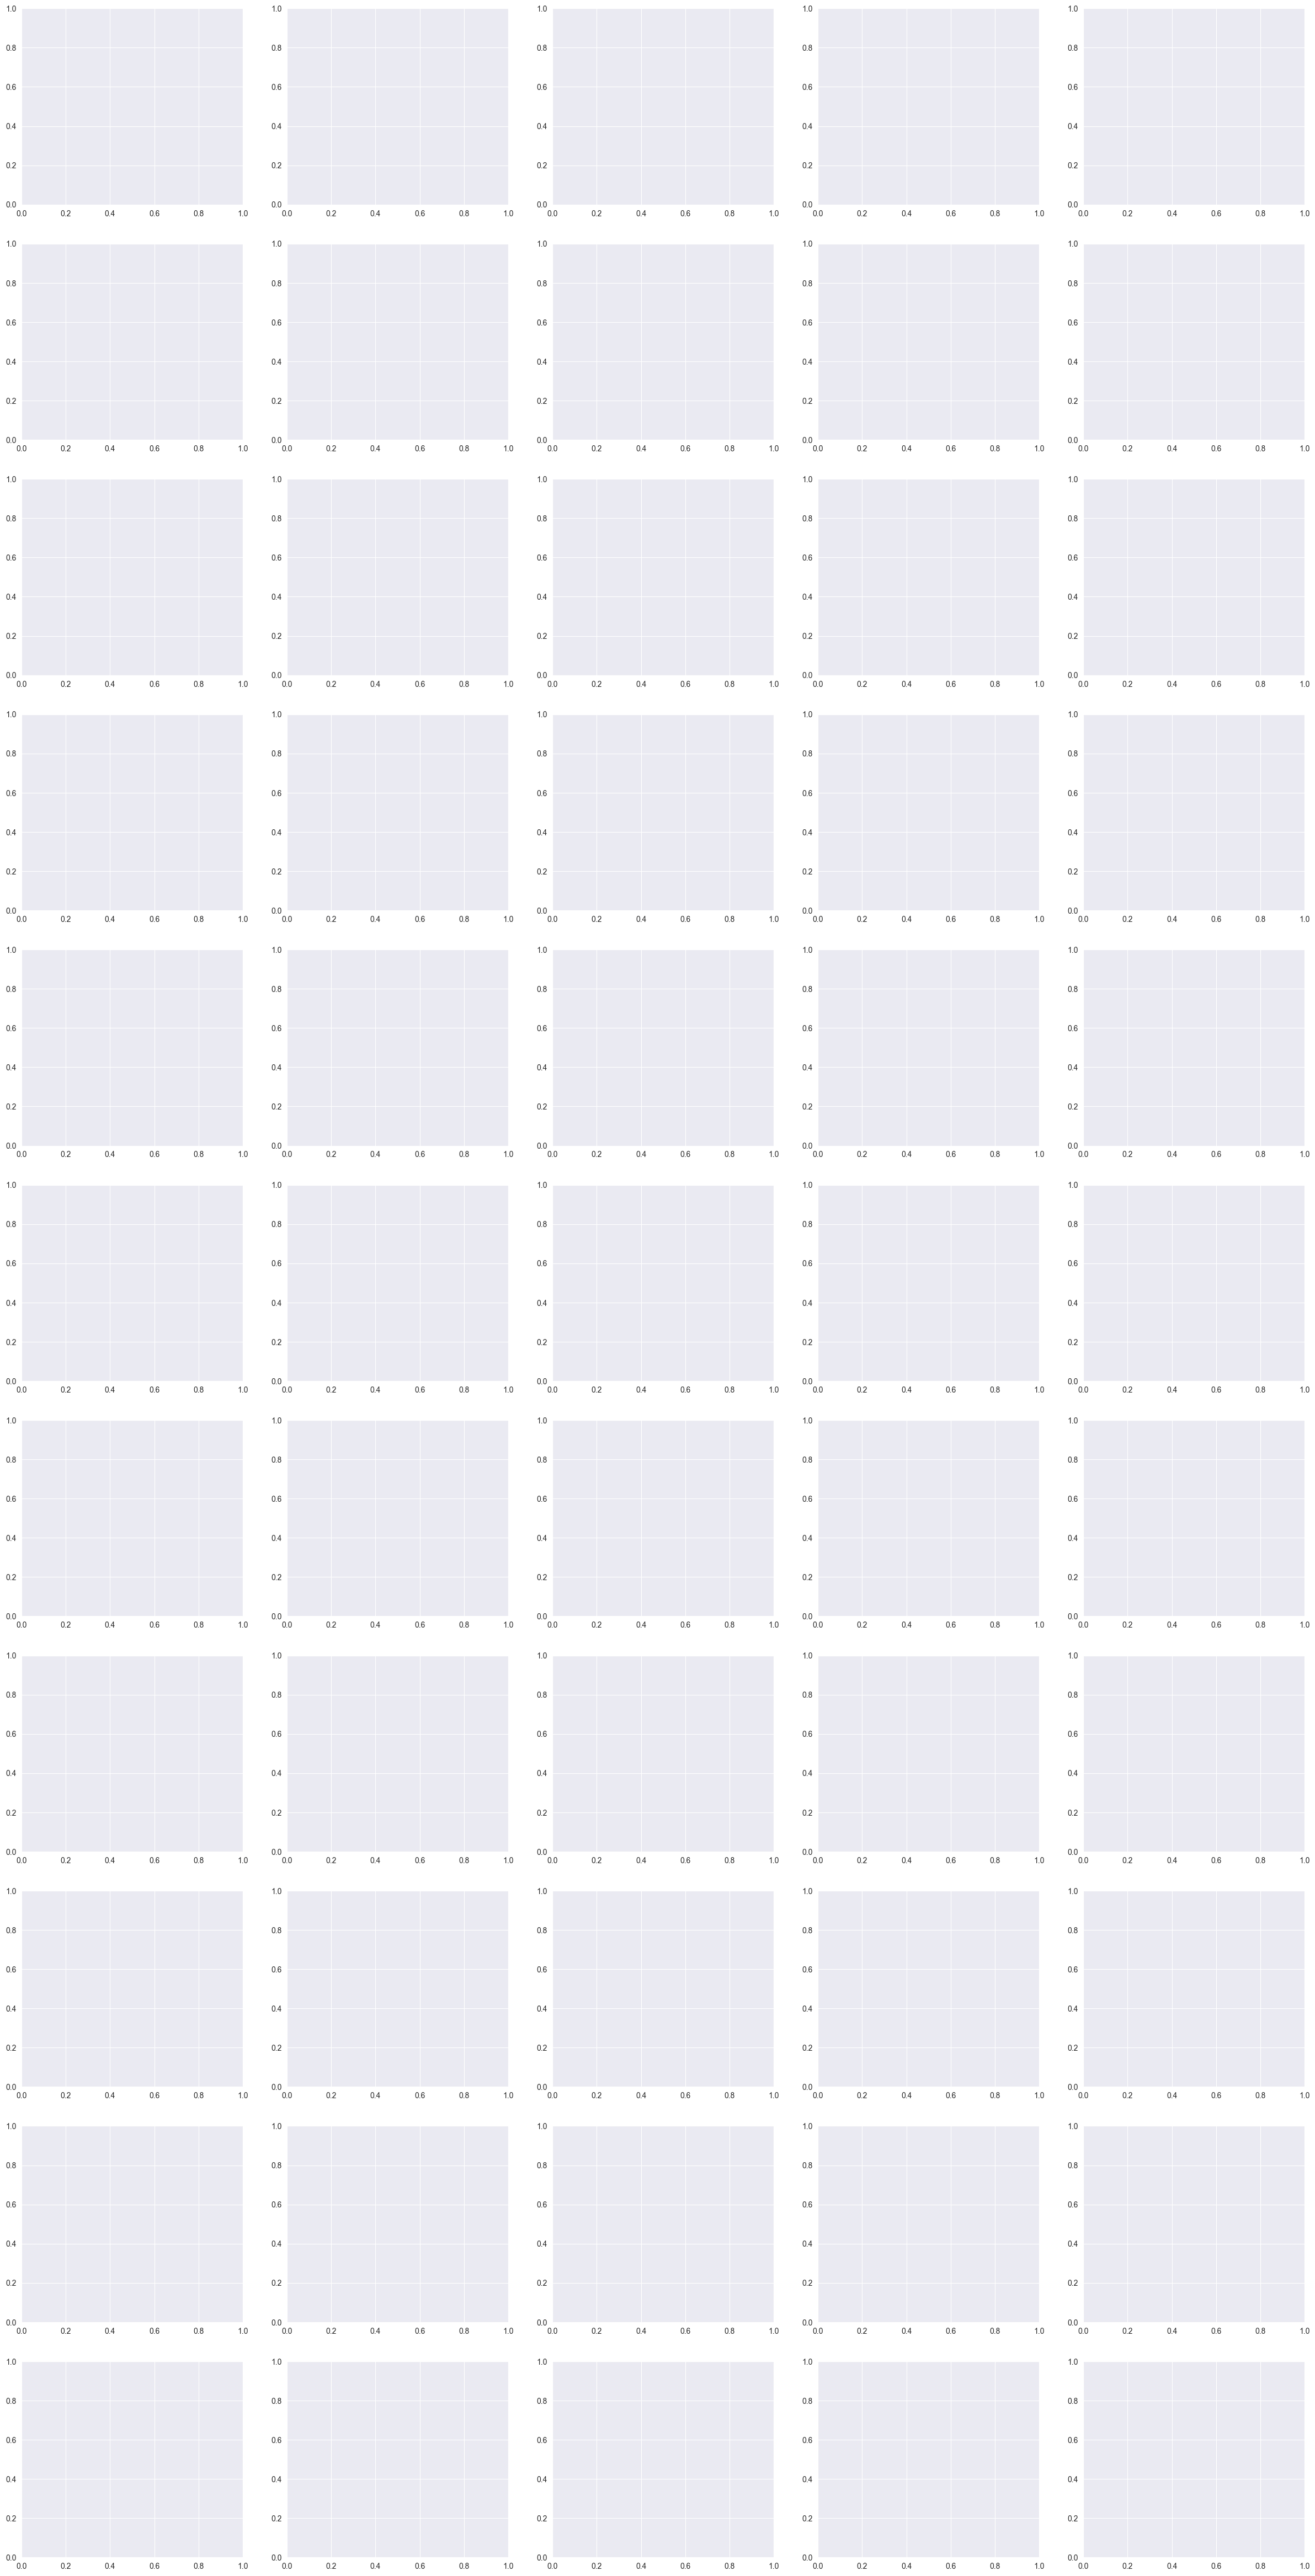

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NUMBER_OF_FILES = 54
DIMS = (11, 5)

fig, ax = plt.subplots(nrows=DIMS[0], ncols=DIMS[1], figsize=(30, 60))

for i, file in enumerate(os.listdir("inputs/model_ready/train")):
    tmp_df = pd.read_csv(os.path.join("inputs/model_ready/train", file))

    cur_ax = ax[i // DIMS[1]][i % DIMS[1]]

    sns.kdeplot(tmp_df["transactions"], color="green", ax=cur_ax)
    sns.kdeplot(tmp_df["sales"], color="red", ax=cur_ax)

    cur_ax.set_title(tmp_df["type"][0])
    cur_ax.set_xlim(0, 6000)


20, B: 46.02137767220903
21, B: 55.58194774346793
22, C: 60.154394299287404
29, E: 48.09976247030879
42, D: 57.24465558194775
52, A: 92.99287410926365
53, D: 30.700712589073635


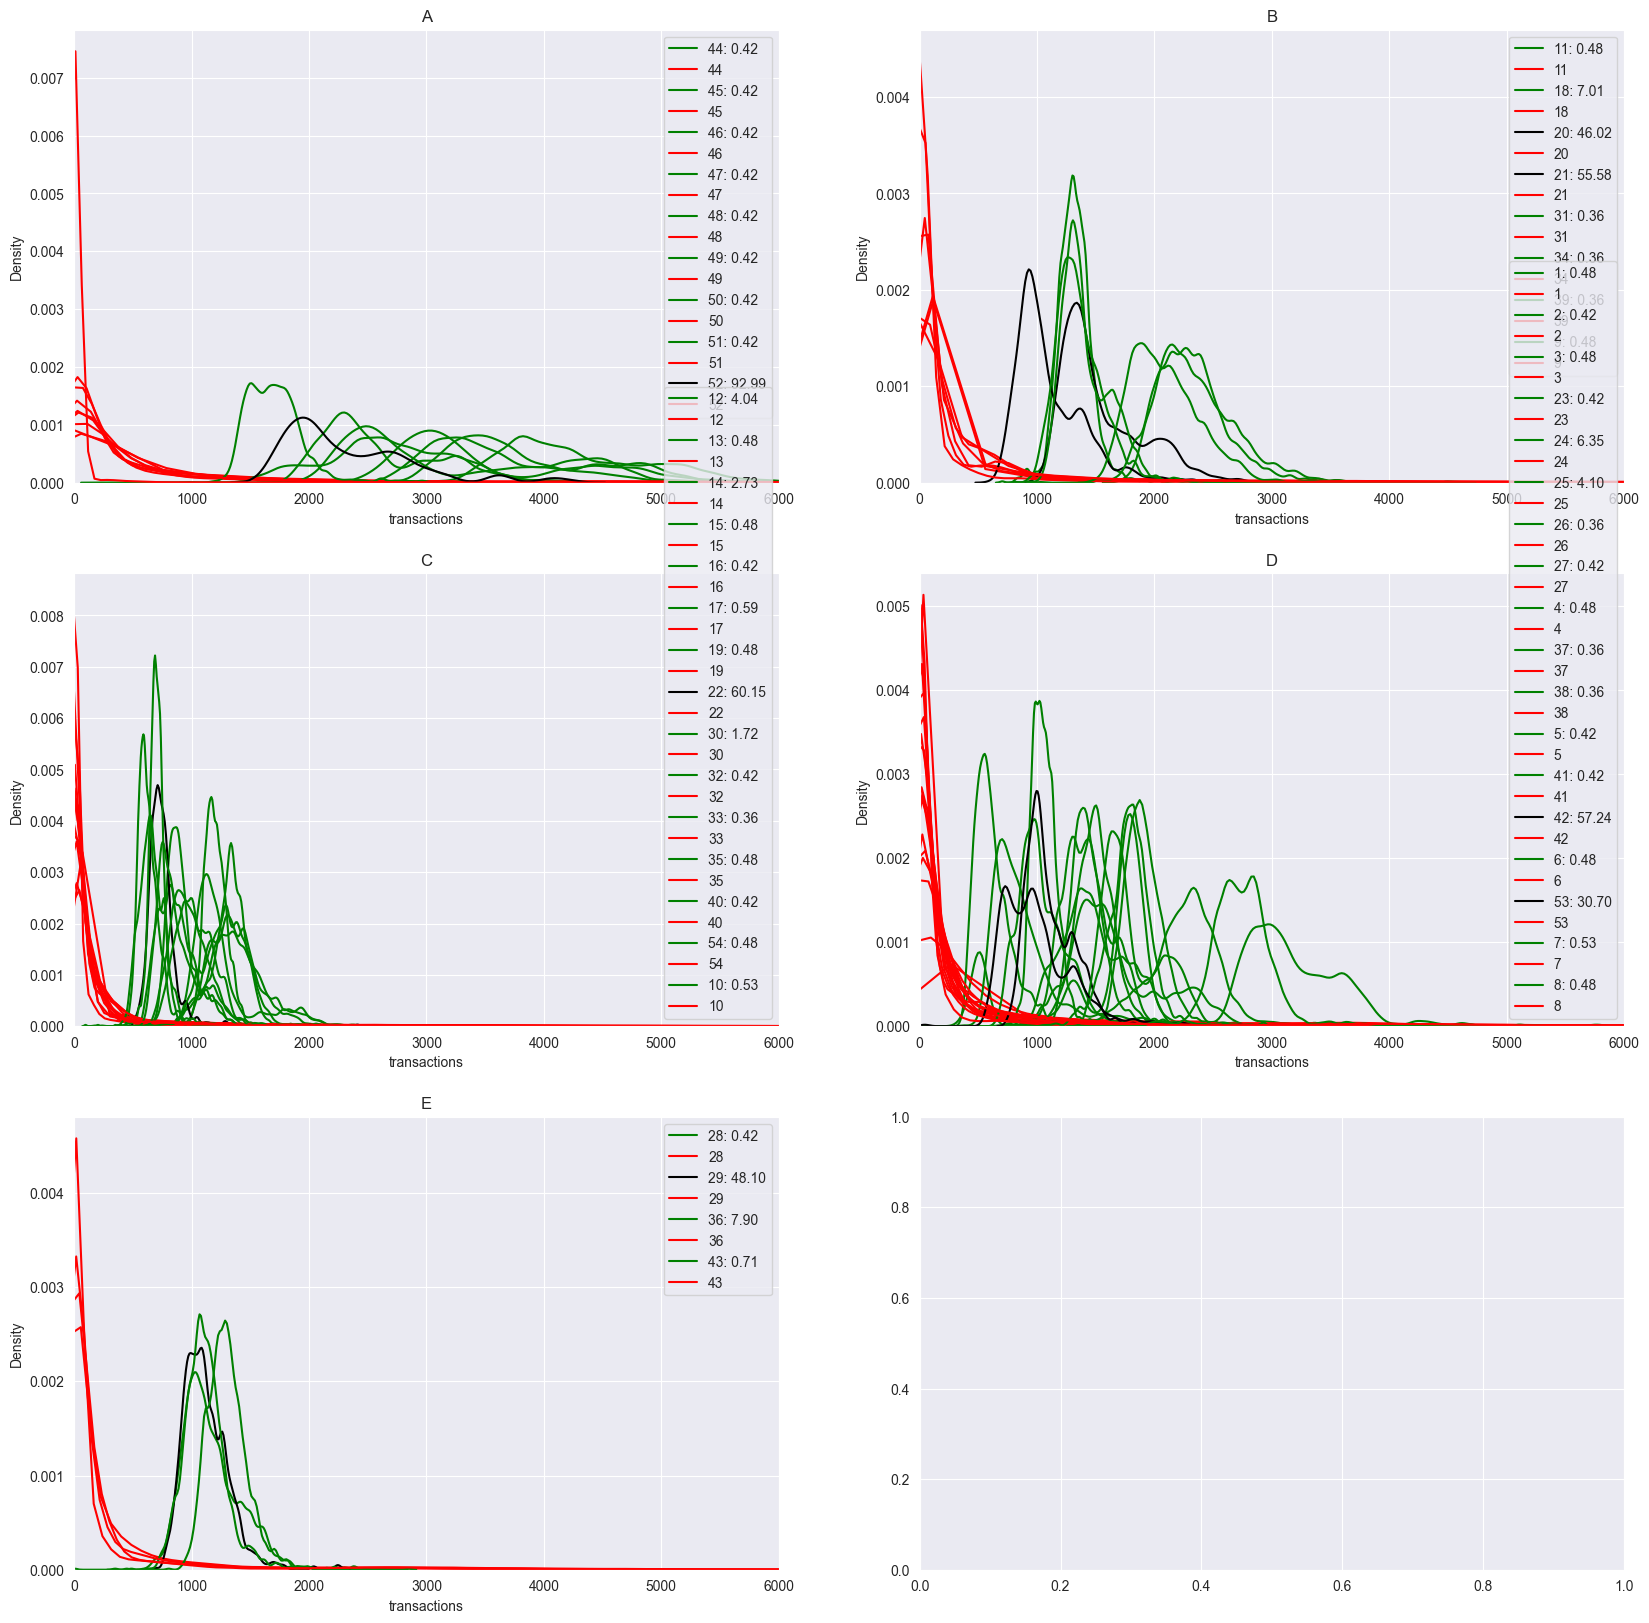

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NUMB_OF_CATEGORIES = 54
DIMS = (3, 2)

fig, ax = plt.subplots(nrows=DIMS[0], ncols=DIMS[1], figsize=(20, 20))

for _, file in enumerate(os.listdir("inputs/model_ready/train")):
    tmp_df = pd.read_csv(os.path.join("inputs/model_ready/train", file))

    i = ord(tmp_df["type"][0][0]) - ord('A')

    cur_ax = ax[i // DIMS[1]][i % DIMS[1]]

    n_nulls = tmp_df["transactions"].isnull().sum() / len(tmp_df) * 100
    color = "green"
    if n_nulls > 30:
        print(f"{tmp_df["store_nbr"][0]}, {tmp_df['type'][0]}: {n_nulls}")
        color = "black"

    sns.kdeplot(tmp_df["transactions"], color=color, ax=cur_ax, label=f"{tmp_df["store_nbr"][0]}: {n_nulls:.2f}")
    sns.kdeplot(tmp_df["sales"], color="red", ax=cur_ax, label=tmp_df["store_nbr"][0])

    cur_ax.set_title(tmp_df["type"][0])
    cur_ax.set_xlim(0, 6000)

    cur_ax.legend()